<a href="https://colab.research.google.com/github/jamescp/python/blob/main/AnaliseCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise dos dados da pandemia de Covid-19 em São Paulo durante os anos de 2020 a março/2023.**


Trabalho Final: Python para quem usa R.

Autor: Jamesson Amaral Gomes

email: jamesson.agomes@gmail.com

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt # plotting data


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

In [7]:
#Transformação tipo da colunda data:
df['date'] = pd.to_datetime(df['date'])

#Seleciona somente o estado do Maranhão
dados= df[df.state == "SP"]

Casos e Óbitos atualizados do Maranhão.

In [8]:
#Visualização do conjunto de dos dados
dados.columns

Index(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'],
      dtype='object')

In [9]:
#Imprime dados atualizados dos Casos e Óbitos acumulados desde o início da pandemia no Maranhão.
print("DATA:", dados['date'].max())
print('CASOS MA:', dados['newCases'].sum(),'\nÓBITOS MA:',dados['newDeaths'].sum())

DATA: 2023-03-18 00:00:00
CASOS MA: 6469442 
ÓBITOS MA: 179039


In [10]:
#Cria as colunas  mes e ano
dados['mes'] = dados['date'].dt.strftime('%b')
dados['meses'] = dados['date'].dt.to_period('m')
dados['ano'] = dados['date'].dt.strftime('%Y')

<ipython-input-10-c2599adecd78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['mes'] = dados['date'].dt.strftime('%b')
<ipython-input-10-c2599adecd78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['meses'] = dados['date'].dt.to_period('m')
<ipython-input-10-c2599adecd78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [15]:
#Imprime as últimas linhas da tabela ("table'1")
table1 = dados.groupby(['ano', 'meses','mes']).agg(
    casos = ("newCases", "sum"),
    obitos = ("newDeaths", "sum")
)

table1.tail()

casos  obitos
ano  meses   mes                
2022 2022-11 Nov   46970     695
     2022-12 Dec  124814    1162
2023 2023-01 Jan   97174    1064
     2023-02 Feb   48658     518
     2023-03 Mar    8277      46

#Curva de Casos Acumulados anos 2020 a 2023.

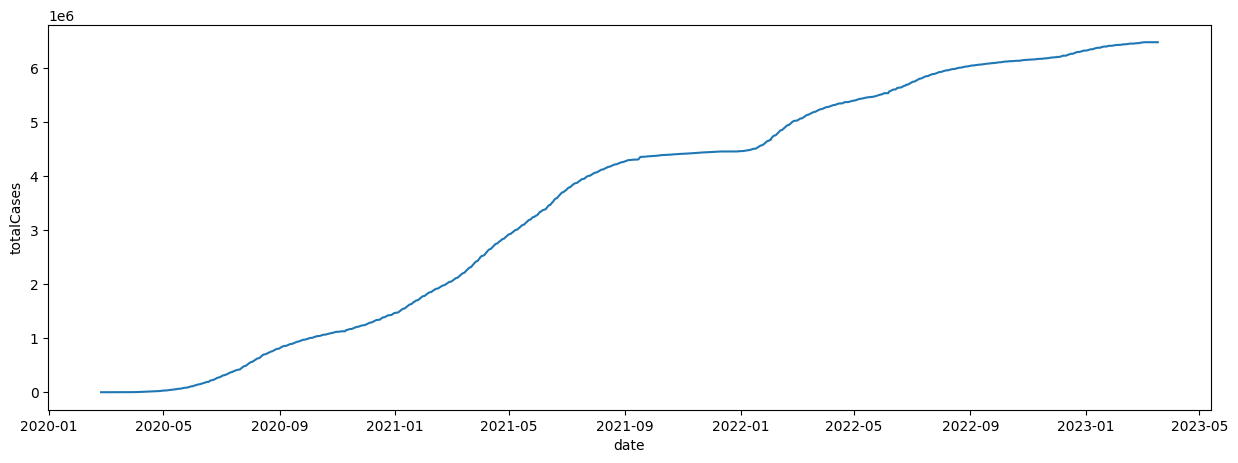

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(data=dados, x='date', y='totalCases');

#Curva de Casos anos 2021 e 2022.

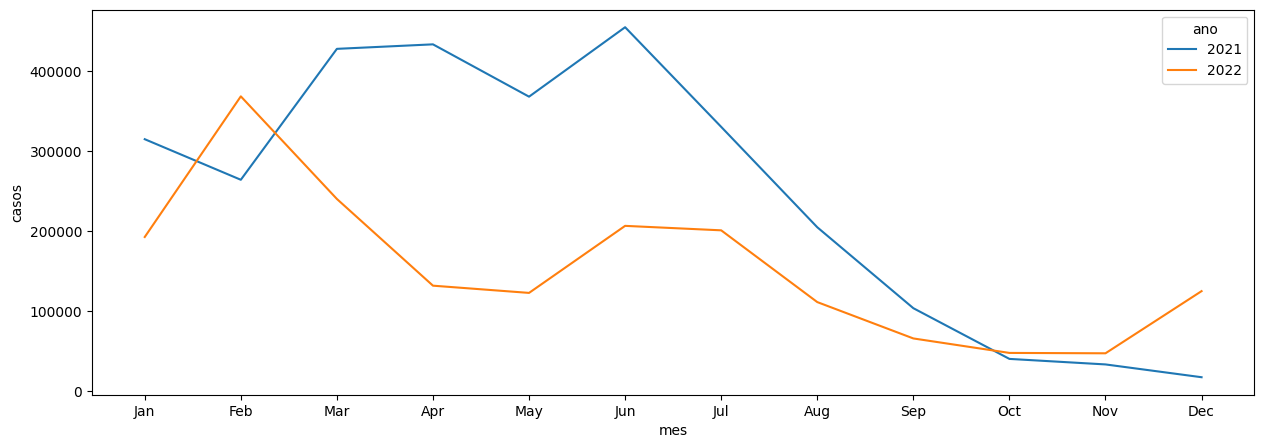

In [17]:
plt.figure(figsize=(15,5))
sns.lineplot(x='mes',y='casos',data=table1.query("ano in['2021','2022']"),   hue='ano');
plt.show()

#Curva de Casos anos 2020 e 2021.

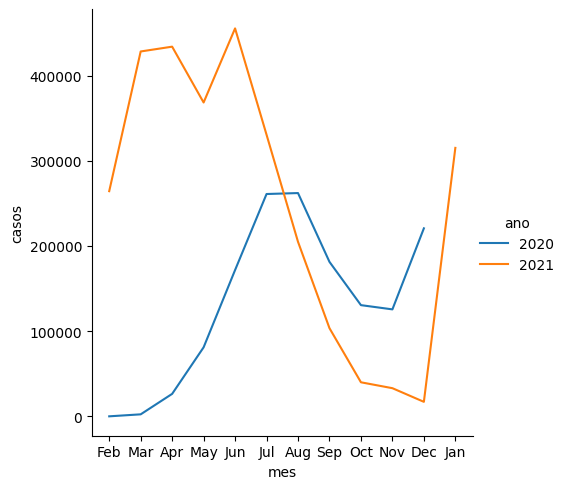

In [19]:

sns.relplot(x='mes', y='casos', data=table1.query("ano in['2020','2021']"), kind = 'line', hue='ano');
plt.show()

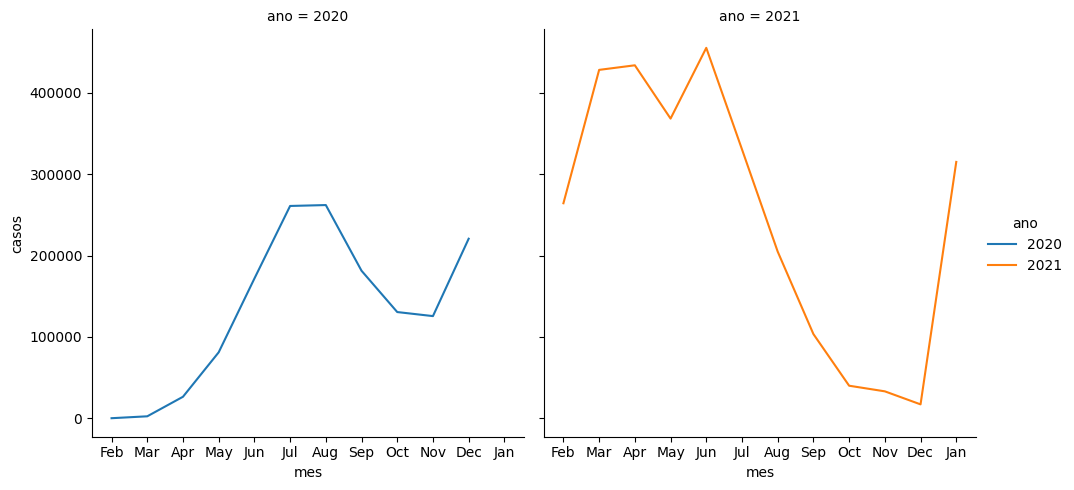

In [20]:
sns.relplot(x='mes', y='casos', data=table1.query("ano in['2020','2021']"), kind = 'line', hue='ano', col = 'ano');
